In [161]:
import pandas as pd 
import numpy as np

import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle

In [162]:
df = pd.read_csv(r"C:\Users\admin\Downloads\wine.csv")
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [163]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: xlabel='Malic.acid', ylabel='Density'>

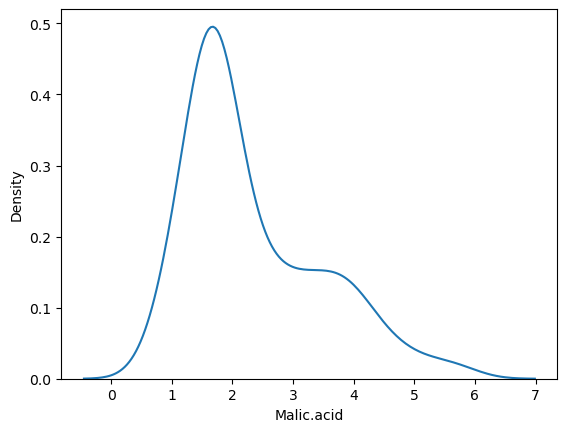

In [165]:
sns.kdeplot(df["Malic.acid"])

In [166]:
df["Malic.acid"].skew()

1.0396511925814442

In [167]:
q1 = df["Malic.acid"].quantile(0.25)
q3 = df["Malic.acid"].quantile(0.75)


iqr = q3 - q1
print("IQR >> ",iqr)

Upper_tail = q3 + 1.5*iqr
Lower_Tail = q1 - 1.5*iqr

print("Lower Tail :",Lower_Tail)
print("Upper Tail :",Upper_tail)

IQR >>  1.48
Lower Tail : -0.6174999999999997
Upper Tail : 5.3025


<Axes: >

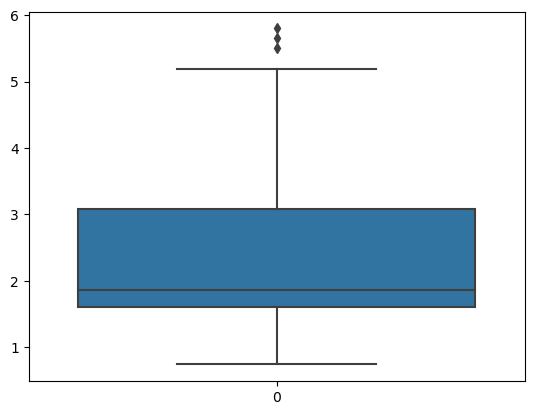

In [168]:
sns.boxplot(df["Malic.acid"],whis=1.5)

<Axes: >

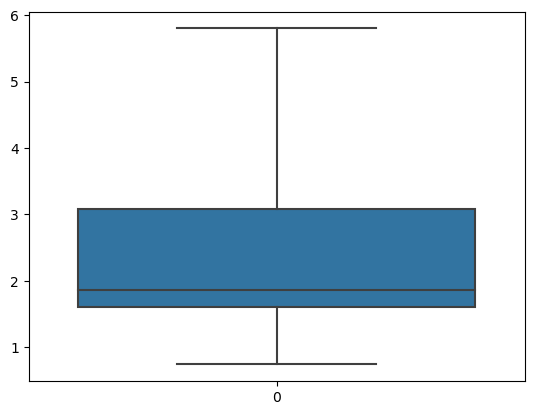

In [169]:
sns.boxplot(df["Malic.acid"],whis=5)

In [170]:
df.loc[df["Malic.acid"] > Upper_tail ]

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [171]:
new_df = df.loc[df["Malic.acid"] < Upper_tail ]
new_df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<Axes: xlabel='Malic.acid'>

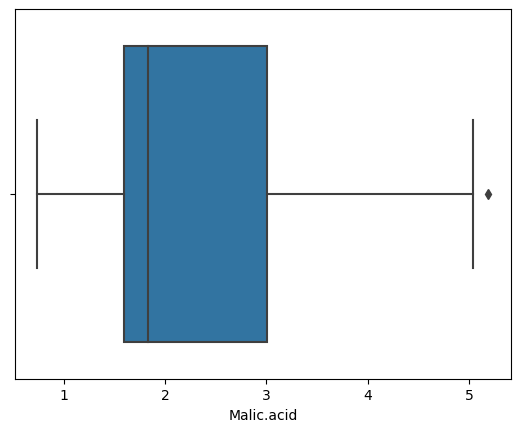

In [172]:
sns.boxplot(x = new_df["Malic.acid"])

<Axes: xlabel='Malic.acid'>

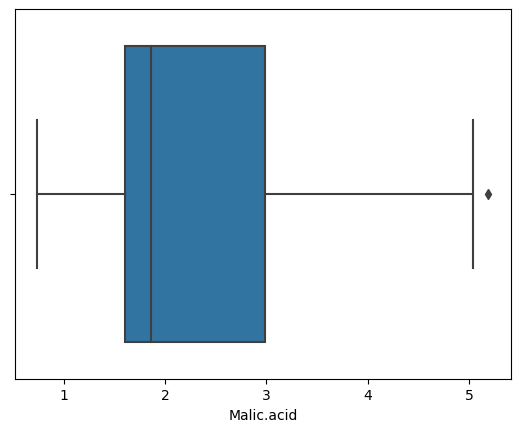

In [173]:
df["Malic.acid"] = np.where(df["Malic.acid"] > Upper_tail,df["Malic.acid"].median(),df["Malic.acid"])
sns.boxplot(x = df["Malic.acid"])

In [174]:
df["Malic.acid"].mean()

2.2725

In [175]:
df["Malic.acid"].median()

1.8625000000000003

In [176]:
q1 = df["Malic.acid"].quantile(0.25)
q3 = df["Malic.acid"].quantile(0.75)


iqr = q3 - q1
print("IQR >> ",iqr)

Upper_tail = q3 + 1.5*iqr
Lower_Tail = q1 - 1.5*iqr

print("Lower Tail :",Lower_Tail)
print("Upper Tail :",Upper_tail)

IQR >>  1.38
Lower Tail : -0.4674999999999998
Upper Tail : 5.0525


In [177]:
median_Malic = new_df.loc[(new_df["Malic.acid"] <= Upper_tail) &
              (new_df["Malic.acid"] >= Lower_Tail),"Malic.acid"].median()
median_Malic

1.83

In [178]:
new_df.loc[(new_df["Malic.acid"] > Upper_tail),"Malic.acid"] = median_Malic #outliers rplaced by meadian

In [179]:
new_df.loc[(new_df["Malic.acid"] > Upper_tail),"Malic.acid"]

Series([], Name: Malic.acid, dtype: float64)

<Axes: >

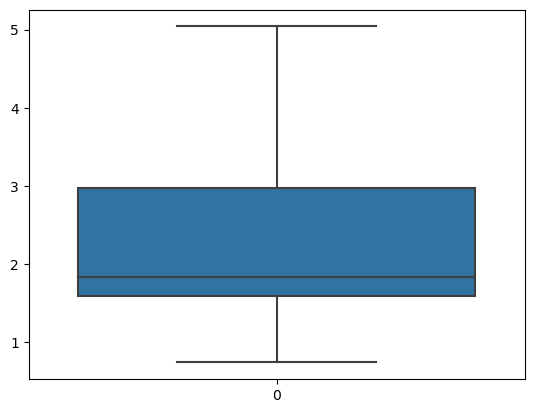

In [180]:
sns.boxplot(new_df["Malic.acid"])

<Axes: xlabel='Ash', ylabel='Density'>

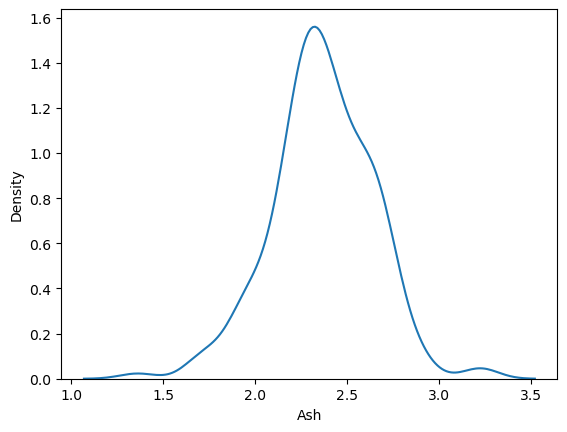

In [181]:
sns.kdeplot(df["Ash"])

In [182]:
df["Ash"].skew()

-0.17669931645735712

In [183]:
q1 = df["Ash"].quantile(0.25)
q3 = df["Ash"].quantile(0.75)


iqr = q3 - q1
print("IQR >> ",iqr)

Upper_tail = q3 + 1.5*iqr
Lower_Tail = q1 - 1.5*iqr

print("Lower Tail :",Lower_Tail)
print("Upper Tail :",Upper_tail)

IQR >>  0.34750000000000014
Lower Tail : 1.6887499999999998
Upper Tail : 3.0787500000000003


<Axes: xlabel='Ash'>

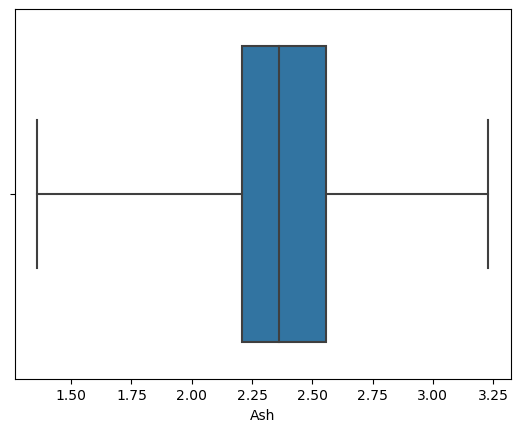

In [184]:
sns.boxplot(x = df["Ash"],whis=3)

In [185]:
df.loc[df["Ash"] > Upper_tail]

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [186]:
new_df =df.loc[df["Ash"] < Upper_tail]
new_df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.710,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.780,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.360,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.950,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.590,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,1.865,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.910,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.280,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.590,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<Axes: xlabel='Ash'>

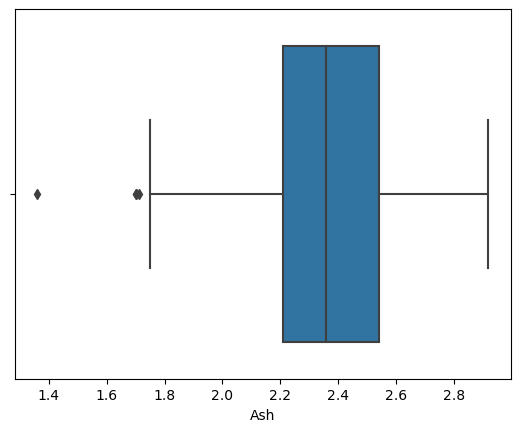

In [187]:
sns.boxplot(x = new_df["Ash"])

In [188]:
new_df["Ash"].mean()

2.356761363636364

In [189]:
new_df["Ash"].median()

2.36

In [190]:
q1 = df["Ash"].quantile(0.25)
q3 = df["Ash"].quantile(0.75)


iqr = q3 - q1
print("IQR >> ",iqr)

Upper_tail = q3 + 1.5*iqr
Lower_Tail = q1 - 1.5*iqr

print("Lower Tail :",Lower_Tail)
print("Upper Tail :",Upper_tail)

IQR >>  0.34750000000000014
Lower Tail : 1.6887499999999998
Upper Tail : 3.0787500000000003


In [191]:
median_Ash = new_df.loc[(new_df["Ash"] <= Upper_tail) &
              (new_df["Ash"] >= Lower_Tail),"Ash"].median()
median_Ash

2.36

In [192]:
new_df.loc[(new_df["Ash"] > Upper_tail),"Ash"] = median_Ash #outliers rplaced by meadian

In [193]:
new_df.loc[(new_df["Ash"] > Upper_tail),"Ash"]

Series([], Name: Ash, dtype: float64)

<Axes: xlabel='Acl'>

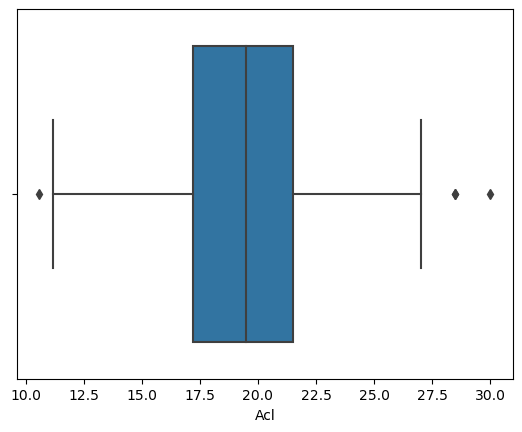

In [194]:
sns.boxplot(x= df["Acl"])

<Axes: xlabel='Acl', ylabel='Density'>

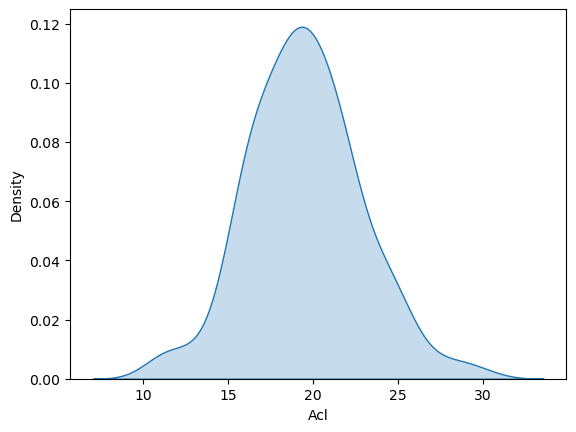

In [195]:
sns.kdeplot(df["Acl"],fill=True)

In [196]:
df["Mg"].skew()

1.098191054755161

In [197]:
q1 = df["Mg"].quantile(0.25)
q3 = df["Mg"].quantile(0.75)


iqr = q3 - q1
print("IQR >> ",iqr)

Upper_tail = q3 + 1.5*iqr
Lower_Tail = q1 - 1.5*iqr

print("Lower Tail :",Lower_Tail)
print("Upper Tail :",Upper_tail)

IQR >>  19.0
Lower Tail : 59.5
Upper Tail : 135.5


<Axes: xlabel='Mg'>

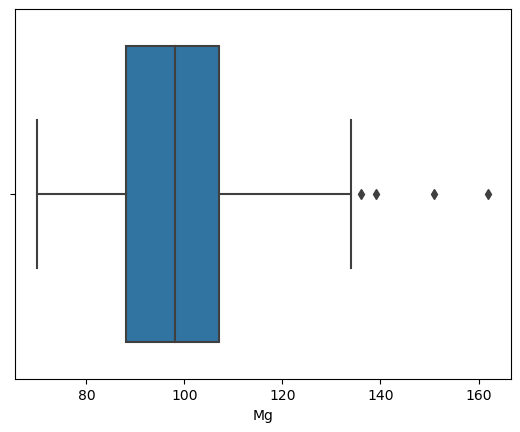

In [198]:
sns.boxplot(x = df["Mg"],whis=1.5)

<Axes: >

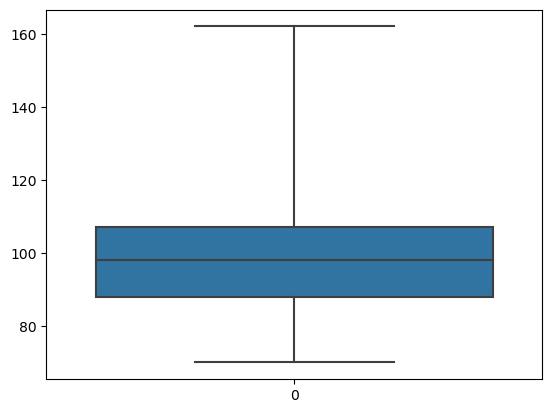

In [199]:
sns.boxplot(df["Mg"],whis=3)

In [200]:
df.loc[df["Mg"] > Upper_tail]

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [201]:
new_df = df.loc[df["Mg"] < Upper_tail]
new_df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.710,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.780,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.360,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.950,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.590,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,1.865,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.910,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.280,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.590,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<Axes: xlabel='Mg'>

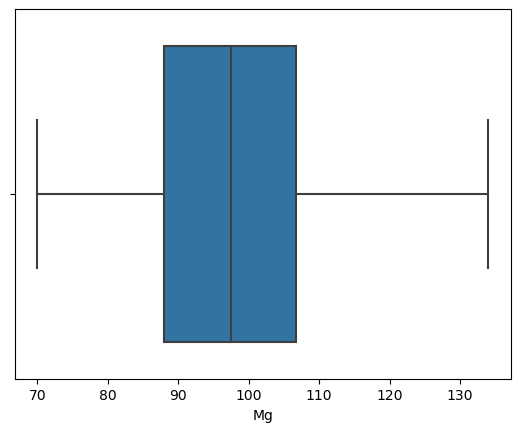

In [202]:
sns.boxplot(x = new_df["Mg"])

# Train-Test-Split

In [203]:
data =df.select_dtypes(exclude=object)
x = df.drop("Proline",axis=1)
y = df["Proline"]


In [204]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [205]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [206]:
#training data evalution
y_pred_train = model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("MSE:",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)

r2 = r2_score(y_train,y_pred_train)
print("r-squared:",r2)

MSE: 26207.337174733668
MAE: 130.9464835777332
r-squared: 0.7112326806669684


In [207]:
#testing data evalution
y_pred_test = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE:",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE:",mae)

r2 = r2_score(y_test,y_pred_test)
print("r-squared:",r2)

MSE: 31886.084648932156
MAE: 140.38576615429665
r-squared: 0.7484931284223957
